# ABOUT:
- this notebook attempts **to discover, which hyperparameter of Simple-X has the most significant effect on performance**
- background:
    - previously, hypothesis testing concluded that neg_seq_len and margin had significant positive effect on performance
    - to get a better idea we could use gradient boosting model and linear regression model
- Strategy:
    - 1. utilize the feature importance values from gradient boosting to quantify the effect on hyperparameters on performance
    - 2. utilize the coefficients on linear regression to quantify the effect on hyperparameters on performance
- findings:
    - turns out that the negative weight that has the most significant effect on performance

### processing and gradient boost model training

In [1]:
import pandas as pd
paths = [r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\hyperparameter importance 0.csv",
         r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\hyperparameter importance 1.csv",
         r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\hyperparameter importance 2.csv"]
data0 = pd.read_csv(paths[0])
data0 = data0[data0["external_config_dict.margin"]!=0]
data1 = pd.read_csv(paths[1])
data1 = data1[data1["external_config_dict.gamma"]!=1]
# data2 = pd.read_csv(paths[2])
# data2 = data2[data2["external_config_dict.neg_seq_len"]!=1]
data = pd.concat([data0,data1]).reset_index(drop = True)
data

,Name,external_config_dict.margin,external_config_dict.embedding_size,external_config_dict.history_len,external_config_dict.gamma,external_config_dict.neg_seq_len,external_config_dict.negative_weight,valid/ndcg@10,valid/ndcg@20,valid/recall@10,valid/recall@20
0,SimpleX-30-0.4-0.7-43-20-61-0.001,0.4,30,61,0.7,43,20,0.2635,0.2793,0.1687,0.2672
1,SimpleX-37-0.4-0.0-79-10-52-0.001,0.4,37,52,0.0,79,10,0.2801,0.2975,0.1716,0.2779
2,SimpleX-20-0.3-0.5-71-32-51-0.001,0.3,20,51,0.5,71,32,0.2024,0.2221,0.1396,0.2243
3,SimpleX-43-0.3-0.7-44-25-48-0.001,0.3,43,48,0.7,44,25,0.2524,0.2672,0.1648,0.2556
4,SimpleX-38-0.4-0.2-45-97-89-0.001,0.4,38,89,0.2,45,97,0.1588,0.1745,0.1030,0.1750
5,SimpleX-38-0.3-0.6-54-34-63-0.001,0.3,38,63,0.6,54,34,0.2200,0.2363,0.1487,0.2315
6,SimpleX-46-0.6-0.1-29-86-22-0.001,0.6,46,22,0.1,29,86,0.2066,0.2155,0.1298,0.2011
7,SimpleX-52-0.2-0.2-20-78-59-0.001,0.2,52,59,0.2,20,78,0.1270,0.1404,0.0775,0.1359
8,SimpleX-25-0.1-0.4-73-14-87-0.001,0.1,25,87,0.4,73,14,0.2654,0.2816,0.1624,0.2657
9,SimpleX-47-0.6-0.3-30-74-62-0.001,0.6,47,62,0.3,30,74,0.1938,0.2056,0.1241,0.1952


In [3]:
from sklearn.ensemble import GradientBoostingRegressor
X_features = ['external_config_dict.margin','external_config_dict.embedding_size','external_config_dict.history_len', 'external_config_dict.gamma','external_config_dict.neg_seq_len','external_config_dict.negative_weight']
y_feature = "valid/recall@10"
X = data[X_features]
y = data[y_feature]

In [4]:
model = GradientBoostingRegressor(random_state=0)
model.fit(X, y)

GradientBoostingRegressor(random_state=0)

# Feature Importance - of gradient boosting model

[Text(0.5, 1.0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Hyperparameter Importance')]

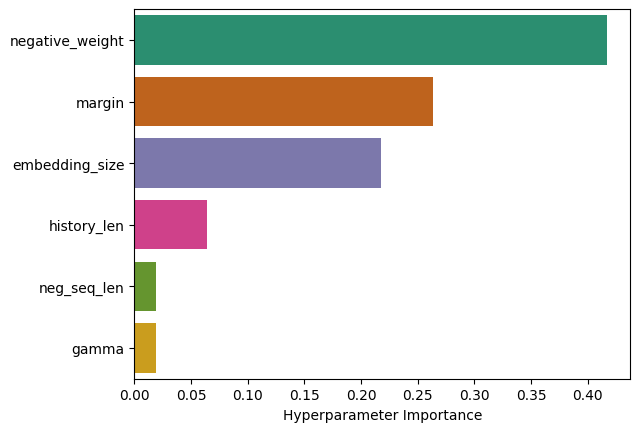

In [31]:
from seaborn import barplot
temp = {
    "feature_name":['margin','embedding_size','history_len', 'gamma','neg_seq_len','negative_weight'], 
    "feature_importance":model.feature_importances_
}
temp = pd.DataFrame(temp)
temp = temp.sort_values("feature_importance", ascending = False)
p = barplot(data = temp, x = "feature_importance", y = "feature_name", palette = "Dark2")
p.set(title = "", ylabel = "", xlabel = "Hyperparameter Importance")


### fit simple linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

# Linear Regression Coefficients

[Text(0.5, 1.0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Linear Regression Coefficients')]

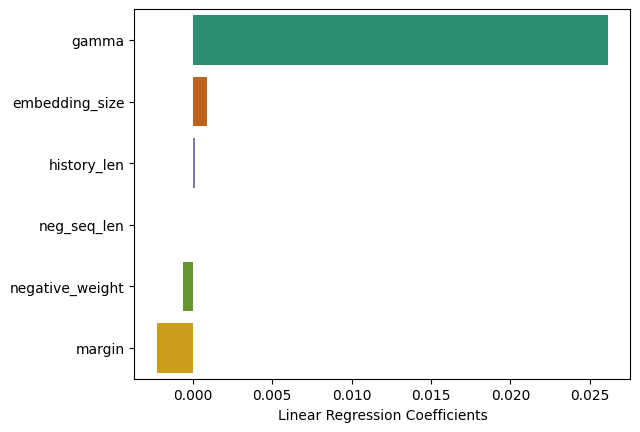

In [29]:
temp1 = pd.DataFrame({"feature_names":[name.split(".")[1] for name in lr.feature_names_in_], "Linear Regression Coefficients": lr.coef_}).sort_values("Linear Regression Coefficients", ascending = False)
p = barplot(data = temp1, x = "Linear Regression Coefficients", y = "feature_names", palette = "Dark2")
p.set(title = "", ylabel = "", xlabel = "Linear Regression Coefficients")
